In [12]:
from pycaret.regression import *
from pycaret.datasets import get_data
import pandas as pd
df0 = pd.read_csv('C:/Users/Rui/OneDrive/桌面/data_xn/CHFHKD_six_hourly_data.csv')
print(df0.shape)
df0.head()

(1473, 12)


,datetime,v,vw,o,c,h,l,t,n,hourly_vwap,hourly_liquidity,fd
0,2010-12-30 06:00:00,714.500000,8.294138,8.298400,8.303600,8.3075,8.2799,3.040217e+13,714.500000,5926.768395,714.500000,25887.681159
1,2010-12-30 12:00:00,253.000000,8.311045,8.310067,8.313367,8.3220,8.2931,3.536171e+13,253.000000,2102.145592,253.000000,8754.325260
2,2010-12-30 18:00:00,266.833333,8.308783,8.311983,8.306200,8.3284,8.2754,3.191232e+13,266.833333,2216.581665,266.833333,5034.591195
3,2010-12-31 00:00:00,589.333333,8.295352,8.293583,8.297267,8.3146,8.2767,3.816605e+13,589.333333,4889.030970,589.333333,15549.692172
4,2010-12-31 06:00:00,567.666667,8.317818,8.319083,8.321067,8.3556,8.2925,4.010738e+13,567.666667,4721.969985,567.666667,8996.302166


In [13]:
(df0.isnull().sum() / len(df0)).sort_values(ascending=False)[:20]

vw                  0.252546
o                   0.252546
c                   0.252546
h                   0.252546
l                   0.252546
hourly_vwap         0.252546
fd                  0.252546
datetime            0.000000
v                   0.000000
t                   0.000000
n                   0.000000
hourly_liquidity    0.000000
dtype: float64

In [14]:
df = df0.dropna(subset=['hourly_vwap'])  # Replace 'column_name' with the name of the column

In [15]:
data = df.sample(frac=0.7, random_state=786)
data_unseen = df.drop(data.index)
 
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
 
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (771, 12)
Unseen Data For Predictions: (330, 12)


In [16]:
from pycaret.regression import *
setup(data = data, target = 'hourly_vwap', session_id=123) 

,Description,Value
0,Session id,123
1,Target,hourly_vwap
2,Target type,Regression
3,Original data shape,"(771, 12)"
4,Transformed data shape,"(771, 12)"
5,Transformed train set shape,"(539, 12)"
6,Transformed test set shape,"(232, 12)"
7,Numeric features,10
8,Categorical features,1
9,Preprocess,True


In [11]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,155.6269,129146.4398,346.2700,0.9950,0.1370,0.0480,0.1630
gbr,Gradient Boosting Regressor,226.0791,139287.7764,359.1394,0.9946,0.1539,0.0673,0.1690
rf,Random Forest Regressor,246.1487,203096.4398,436.9359,0.9919,0.1483,0.0648,0.1920
lr,Linear Regression,318.6589,304825.0392,535.7120,0.9881,0.4714,0.5353,0.4010
lasso,Lasso Regression,333.5348,319474.0925,549.3494,0.9876,0.4681,0.5226,0.2570
ridge,Ridge Regression,339.0554,319973.4183,551.1365,0.9876,0.4673,0.5165,0.1920
lar,Least Angle Regression,331.9356,316782.6607,546.0418,0.9875,0.4711,0.5388,0.1190
lightgbm,Light Gradient Boosting Machine,300.0092,365546.4986,577.0170,0.9865,0.3254,0.2170,0.2150
en,Elastic Net,360.1647,350437.8783,576.6603,0.9865,0.4568,0.4927,0.1150
dt,Decision Tree Regressor,370.4717,531495.7779,690.6955,0.9787,0.1834,0.0737,0.1270


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [17]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,123.1591,88279.3965,297.1185,0.9968,0.0686,0.0247
1,115.0071,105094.4830,324.1828,0.9932,0.1733,0.0613
2,167.1491,178589.0952,422.5980,0.9948,0.1572,0.0599
3,125.3546,50501.4966,224.7254,0.9982,0.1632,0.0622
4,223.6303,333729.6976,577.6934,0.9893,0.1171,0.0502
5,157.3814,105053.1354,324.1190,0.9933,0.0432,0.0214
6,202.7365,169377.9784,411.5556,0.9942,0.1530,0.0596
7,126.4676,69291.8778,263.2335,0.9967,0.1568,0.0539
8,154.5387,108947.8658,330.0725,0.9967,0.1967,0.0345


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,250.9070,426716.7107,653.2356,0.9844,0.3119,0.1719
1,216.5998,196946.1042,443.7861,0.9872,0.4010,0.3648
2,298.5656,503121.3384,709.3105,0.9855,0.2923,0.1624
3,259.9186,290399.1639,538.8870,0.9896,0.2995,0.1716
4,388.0298,618908.0627,786.7071,0.9801,0.2967,0.1775
5,261.8005,222893.6980,472.1162,0.9858,0.1802,0.0802
6,335.3317,378984.4878,615.6172,0.9871,0.2169,0.1035
7,221.8645,149593.1497,386.7727,0.9928,0.2885,0.1584
8,260.1282,209806.9394,458.0469,0.9937,0.0956,0.0406


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


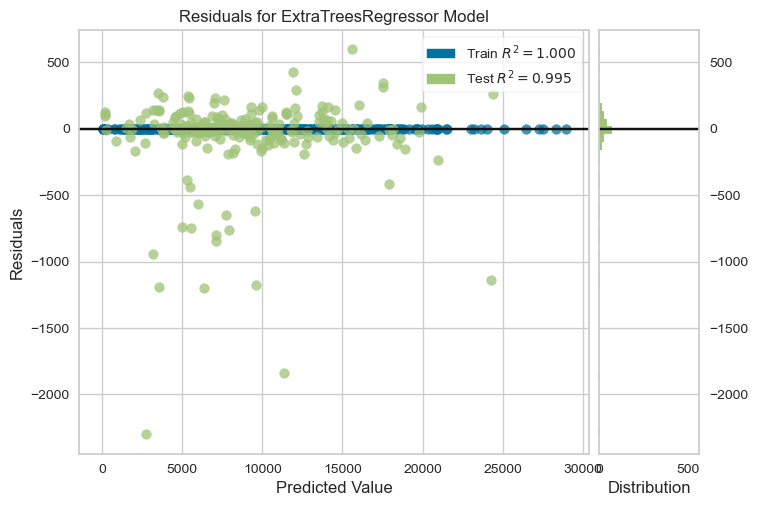

In [19]:
plot_model(et)

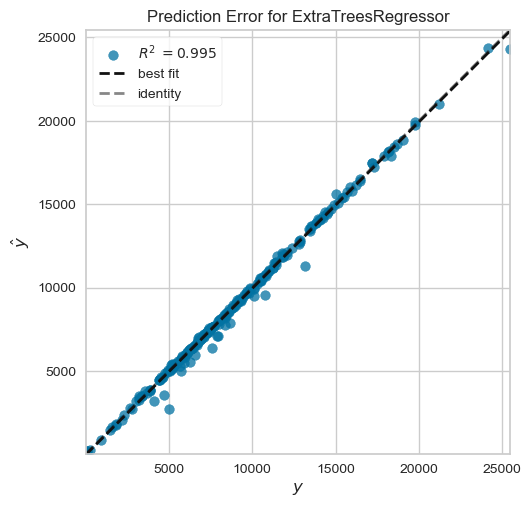

In [20]:
plot_model(et, plot = 'error')

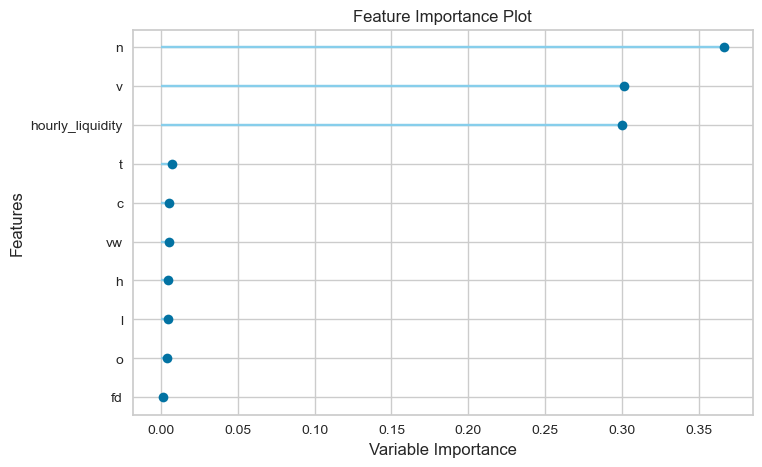

In [21]:
plot_model(tuned_et, plot='feature')

In [22]:
predict_model(et);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,141.2182,96249.9337,310.2417,0.9953,0.1269,0.0421


In [23]:
final_et = finalize_model(et)
print(final_et)

Pipeline(memory=FastMemory(location=C:\Users\Rui\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['v', 'vw', 'o', 'c', 'h', 'l', 't',
                                             'n', 'hourly_liquidity', 'fd'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['datetime'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['datetime'],
                                    transformer=LeaveOneOutEncoder(cols=['datetime'],
                                                                   handle_missing='return_nan',
                                                                   random_state=123))),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])
